In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Q1.

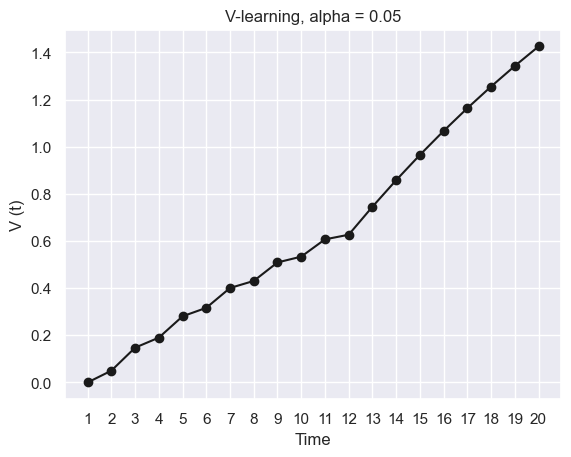

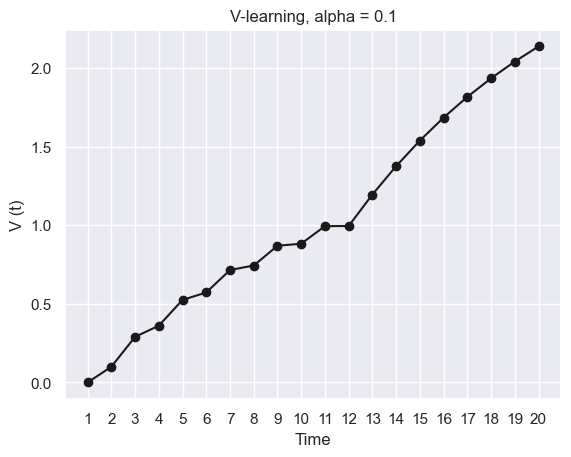

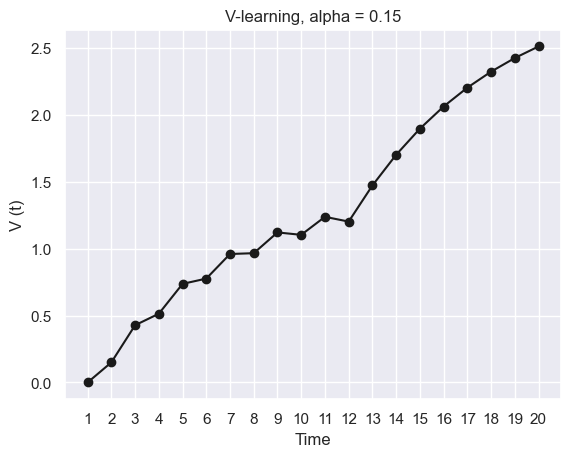

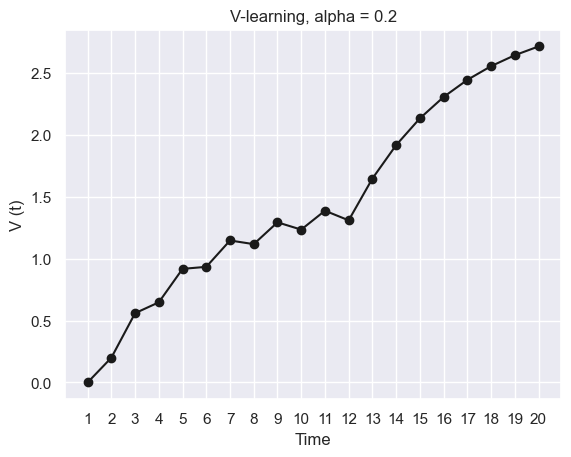

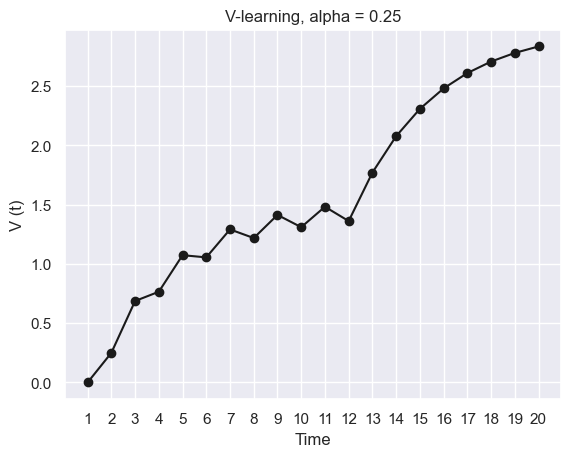

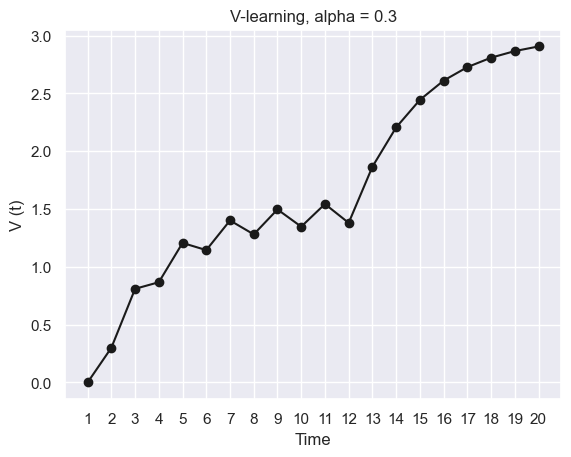

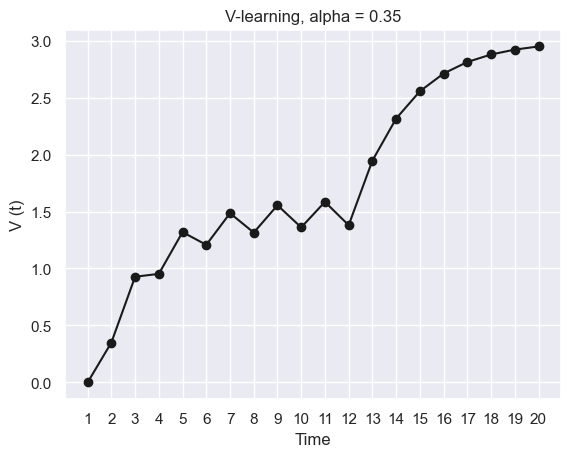

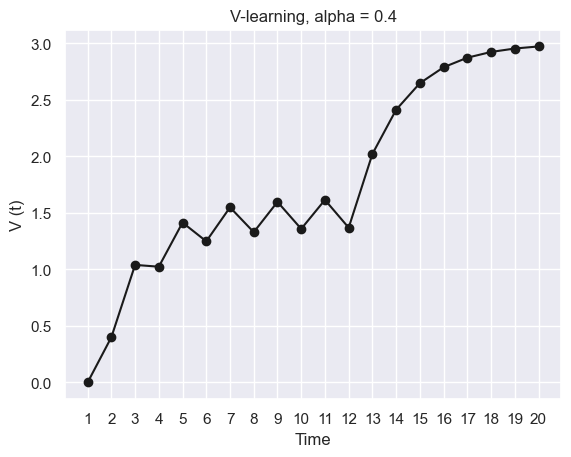

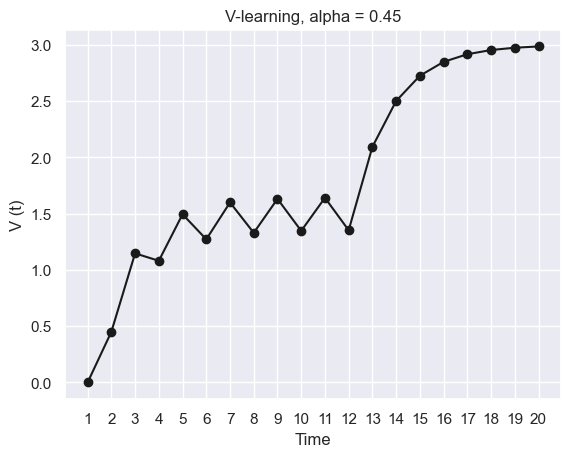

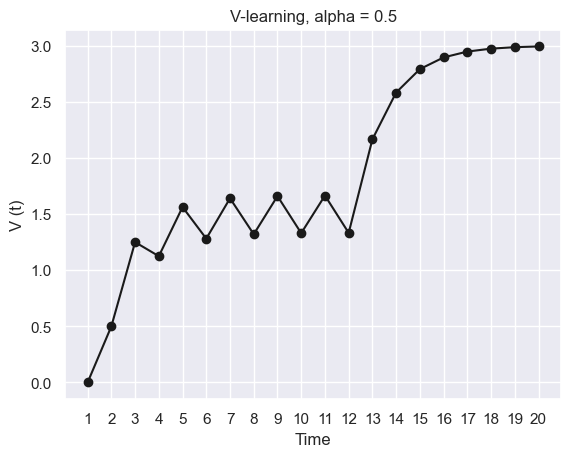

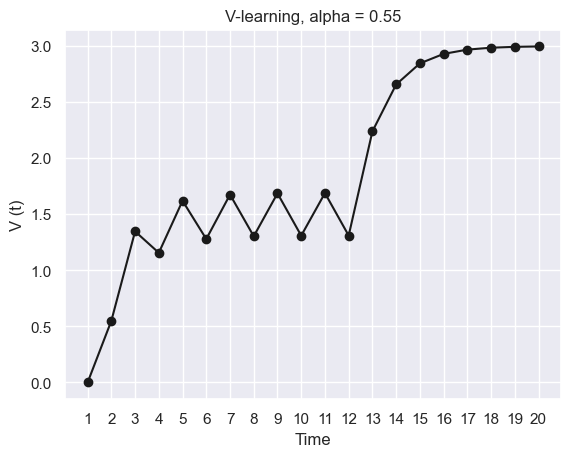

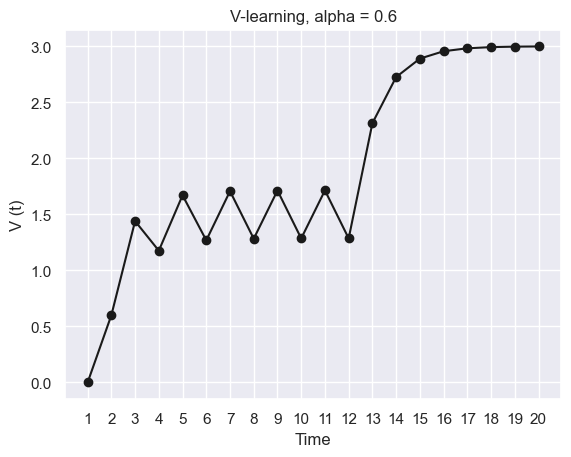

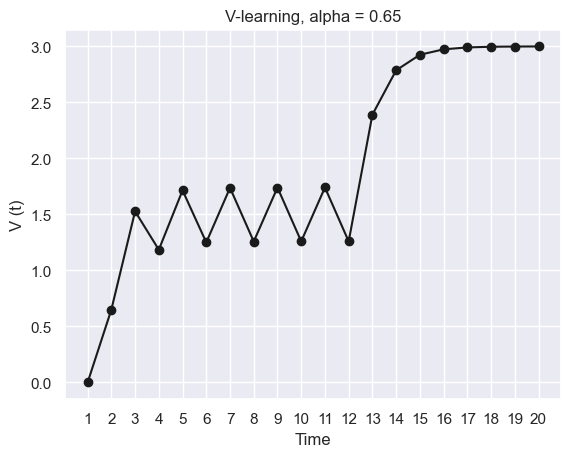

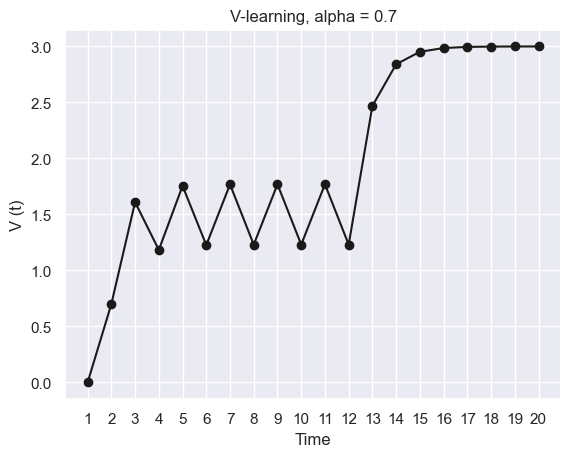

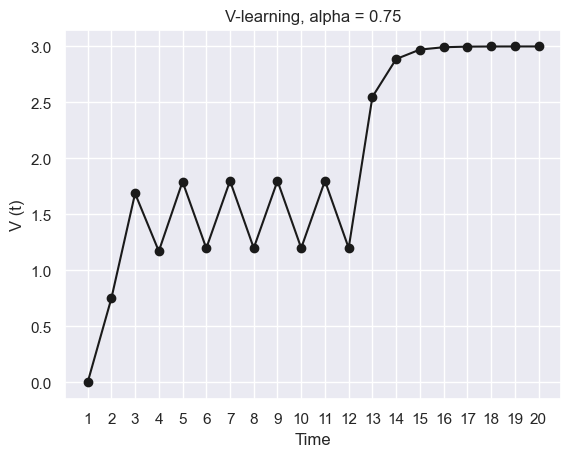

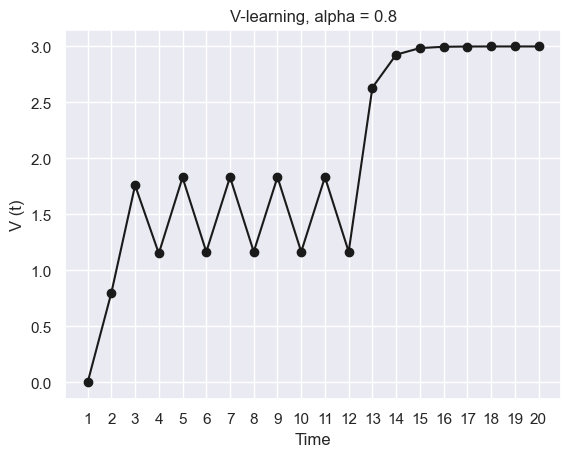

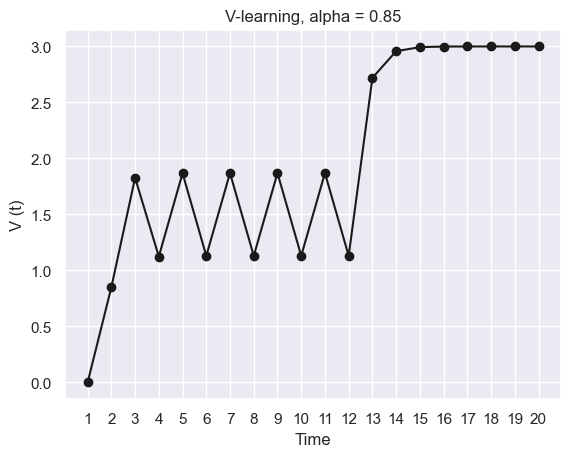

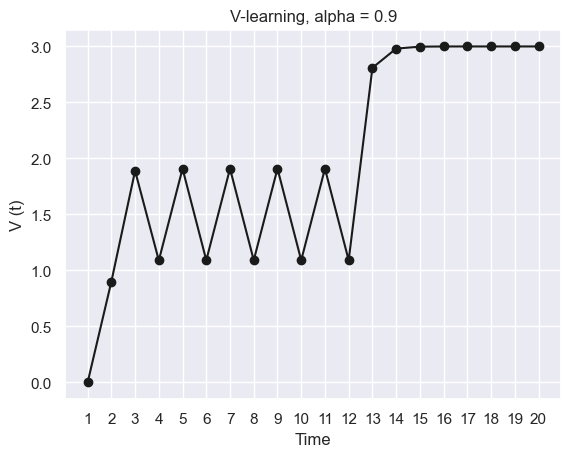

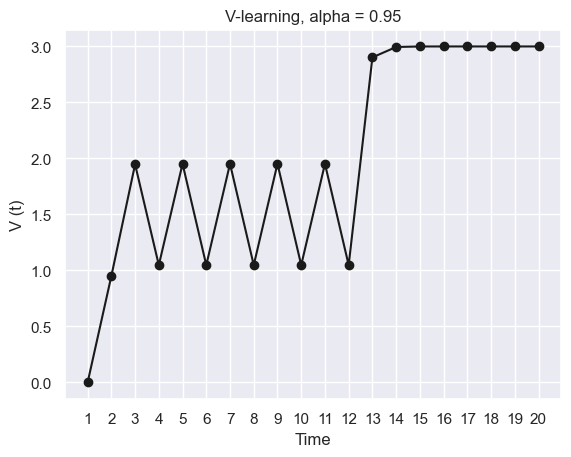

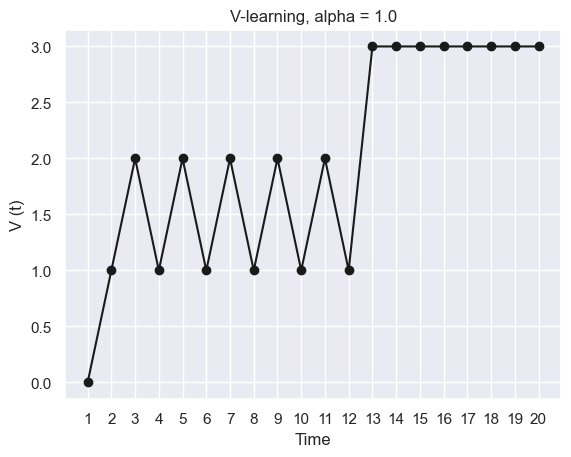

The value of alpha that converges to within 10% of E[V] as quickly as possible for the first 12 trials is 0.45 and this happens at trial 5
The value of alpha that converges to within 10% of E[V] as quickly as possible after trial 13 is 1.0 and this happens at trial 13


In [2]:
t = np.arange(20)
t_plot = np.arange(1, 21)
r = [2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3] # reward-values
V = np.zeros(len(t),)
alphas = np.arange(0.05, 1.01, 0.05) # Learning rate
early_converge_t = np.zeros(len(alphas), )
late_converge_t = np.zeros(len(alphas), )

EV_early = 1.5 # Expected Value of first 12 trials
EV_late = 3 # Expected Value after trial 13
# 10% bound around E[V]
EV_early_bound = [0.9 * EV_early, 1.1 * EV_early]
EV_late_bound = [0.9 * EV_late, 1.1 * EV_late]


for ii in range(len(alphas)):
    alpha = alphas[ii]
    for tval in t:
        if tval != 0:
            # V-learning value update
            delta = r[tval] - V[tval - 1]
            V[tval] = V[tval - 1] + alpha * delta

    # Convergence to E[V] of early trials
    V_early_greater = np.where(V >= EV_early_bound[0])[0]
    V_early_lesser = np.where(V <= EV_early_bound[1])[0]
    V_early_bound_idx = [i for i in V_early_greater if i in V_early_lesser]
    if len(V_early_bound_idx) > 0:
        if V_early_bound_idx[-1] == 11:
            early_converge_t[ii] = V_early_bound_idx[0]
    
    # Convergence to E[V] of late trials
    V_late_greater = np.where(V >= EV_late_bound[0])[0]
    V_late_lesser = np.where(V <= EV_late_bound[1])[0]
    V_late_bound_idx = [i for i in V_late_greater if i in V_late_lesser]
    if len(V_late_bound_idx) > 0:
        if V_late_bound_idx[-1] == 19:
            late_converge_t[ii] = V_late_bound_idx[0]

    plt.figure()
    plt.plot(t_plot, V, 'ko-')
    plt.xlabel('Time')
    plt.ylabel('V (t)')
    plt.title(f'V-learning, alpha = {round(alpha, 2)}')
    plt.xticks(t_plot)
    plt.show()

# Alpha and trial of convergence
early_t = np.where(early_converge_t > 0)[0][-1]
early_alpha = alphas[early_t]
late_t = np.where(late_converge_t > 0)[0][-1]
late_alpha = alphas[late_t]

print(f'The value of alpha that converges to within 10% of E[V] as quickly as possible for the first 12 trials is {round(early_alpha, 2)} and this happens at trial {round(early_converge_t[early_t])+1}')
print(f'The value of alpha that converges to within 10% of E[V] as quickly as possible after trial 13 is {round(late_alpha, 2)} and this happens at trial {round(late_converge_t[late_t])+1}')

From this problem, we can see that if the environment is stochastic which was the scenarion for the first 12 trials, the learning rate should be low to learn changes in the environment; while when the environment is more stable as in the case after trial 13, it is advantageous to have a very high learning rate. We can also see that if the learning rate is too high in noisy environment as is the case for the first 12 trials, learning might never achieve the true E[V].

#### Q2.

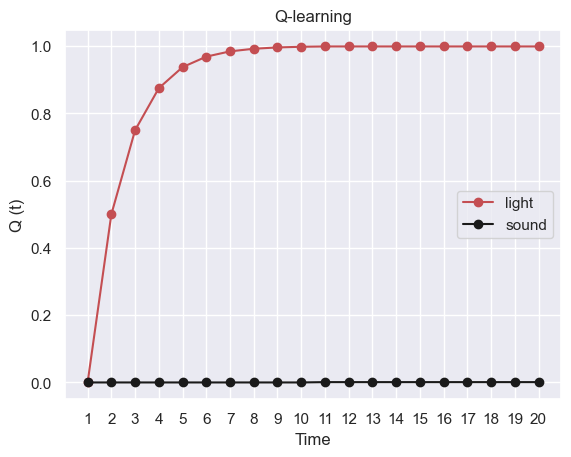

In [3]:
t = np.arange(20)
t_plot = np.arange(1, 21)
sl = np.ones(len(t), dtype = 'int')
ss = np.concatenate((np.zeros(10, dtype = 'int'), np.ones(10, dtype = 'int')))
r = np.ones(len(t)) # reward-values
Q = np.zeros((len(t),2))
alpha = 0.5 # Learning rate
for tval in t:
    if tval != 0:
        # Q-learning value update
        if sl[tval] == 1:
            if ss[tval] == 1:
                delta = r[tval] - (Q[tval-1, 0] + Q[tval-1, 1])
                Q[tval, 0] = Q[tval-1, 0] + alpha * delta
                Q[tval, 1] = Q[tval-1, 1] + alpha * delta
            else:
                delta = r[tval] - (Q[tval-1, 0])
                Q[tval, 0] = Q[tval-1, 0] + alpha * delta
                Q[tval, 1] = Q[tval-1, 1]
        else:
            if ss[tval] == 1:
                delta = r[tval] - (Q[tval-1, 1])
                Q[tval, 0] = Q[tval-1, 0]
                Q[tval, 1] = Q[tval-1, 1] + alpha * delta
                
plt.figure()
plt.plot(t_plot, Q[:, 0], 'ro-', label = 'light')
plt.plot(t_plot, Q[:, 1], 'ko-', label = 'sound')
plt.xlabel('Time')
plt.ylabel('Q (t)')
plt.title('Q-learning')
plt.xticks(t_plot)
plt.legend()
plt.show()

We can see here that since in the initial part of training, the reward is predicted by light, there is learning seen for the light stimulus. However, after turning on sound, there is no conditional learning of reward due to sound. This brings in the concept of attention in reward learning, where stimulus that is attended to has a higher chance of being associated with reward.

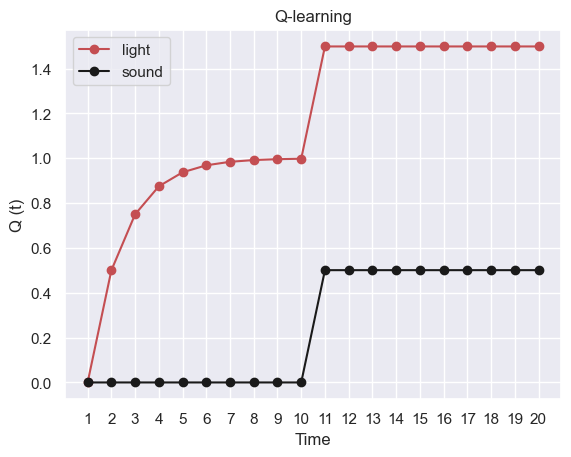

In [4]:
t = np.arange(20)
t_plot = np.arange(1, 21)
sl = np.ones(len(t), dtype = 'int')
ss = np.concatenate((np.zeros(10, dtype = 'int'), np.ones(10, dtype = 'int')))
r = np.concatenate((np.ones(10, dtype = 'int'), 2 * np.ones(10, dtype = 'int'))) # reward-values
Q = np.zeros((len(t),2))
alpha = 0.5
for tval in t:
    if tval != 0:
        # Q-learning value update
        if sl[tval] == 1:
            if ss[tval] == 1:
                delta = r[tval] - (Q[tval-1, 0] + Q[tval-1, 1])
                Q[tval, 0] = Q[tval-1, 0] + alpha * delta
                Q[tval, 1] = Q[tval-1, 1] + alpha * delta
            else:
                delta = r[tval] - (Q[tval-1, 0])
                Q[tval, 0] = Q[tval-1, 0] + alpha * delta
                Q[tval, 1] = Q[tval-1, 1]
        else:
            if ss[tval] == 1:
                delta = r[tval] - (Q[tval-1, 1])
                Q[tval, 0] = Q[tval-1, 0]
                Q[tval, 1] = Q[tval-1, 1] + alpha * delta
                
plt.figure()
plt.plot(t_plot, Q[:, 0], 'ro-', label = 'light')
plt.plot(t_plot, Q[:, 1], 'ko-', label = 'sound')
plt.xlabel('Time')
plt.ylabel('Q (t)')
plt.title('Q-learning')
plt.xticks(t_plot)
plt.legend()
plt.show()

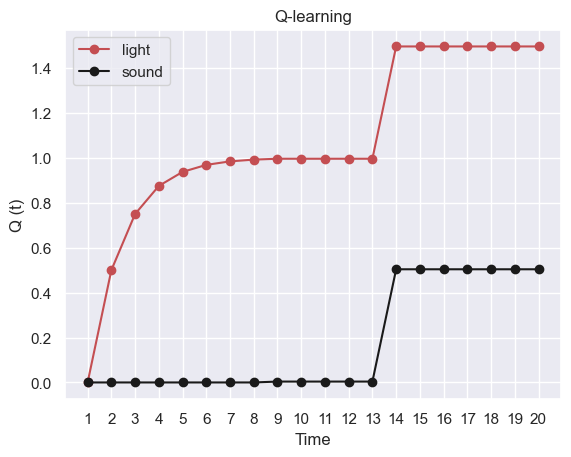

In [5]:
t = np.arange(20)
t_plot = np.arange(1, 21)
sl = np.ones(len(t), dtype = 'int')
ss = np.concatenate((np.zeros(8, dtype = 'int'), np.ones(12, dtype = 'int')))
r = np.concatenate((np.ones(13, dtype = 'int'), 2 * np.ones(7, dtype = 'int'))) # reward-values
Q = np.zeros((len(t),2))
alpha = 0.5
for tval in t:
    if tval != 0:
        # Q-learning value update
        if sl[tval] == 1:
            if ss[tval] == 1:
                delta = r[tval] - (Q[tval-1, 0] + Q[tval-1, 1])
                Q[tval, 0] = Q[tval-1, 0] + alpha * delta
                Q[tval, 1] = Q[tval-1, 1] + alpha * delta
            else:
                delta = r[tval] - (Q[tval-1, 0])
                Q[tval, 0] = Q[tval-1, 0] + alpha * delta
                Q[tval, 1] = Q[tval-1, 1]
        else:
            if ss[tval] == 1:
                delta = r[tval] - (Q[tval-1, 1])
                Q[tval, 0] = Q[tval-1, 0]
                Q[tval, 1] = Q[tval-1, 1] + alpha * delta
                
plt.figure()
plt.plot(t_plot, Q[:, 0], 'ro-', label = 'light')
plt.plot(t_plot, Q[:, 1], 'ko-', label = 'sound')
plt.xlabel('Time')
plt.ylabel('Q (t)')
plt.title('Q-learning')
plt.xticks(t_plot)
plt.legend()
plt.show()

In the last two simulations, we can see that, initially, when the sound is turned off an only light is shown, there is learning happening only for light. However, in the second simulation, when the sound is turned on and the reward value is increased, learning occurs for sound stimulus. Additionally, weight given to the light stimulus increases too. In the alst simulation, we can see that when the sound is turned on but there is no change in the reward received, there is no learning for sound stimulus. However, when the reward is also increased, there is a corresponding increase in weights for both light and sound stimuli.